# <en><center>Advanced Pandas Manipulation</center></en>

## Table of Contents

- [Basic MultiIndexes](#Basic-MultiIndexes)
- [Advanced - MultiIndexes](#Advanced---MultiIndexes)
- [Stacking & Unstacking](#Stacking-&-Unstacking)
- [Pivoting](#Pivoting)
- [Pivot Margins](#Pivot-Margins)
- [Crosstab](#Crosstab)
- [Melting](#Melting)

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [84]:
sns.set(rc={'figure.figsize':(10,8)})

In [45]:
plt.rcdefaults()

In [46]:
plt.rcParams.update({'axes.facecolor':'white'})

In [47]:
plt.rcParams.update()

## Basic MultiIndexes

### Dataset

In [4]:
flight_data = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Pandas Bootcamp\\P87-Section-7-Advanced-Manipulation-Resources\\flights2.csv.gz"

In [5]:
dfo = pd.read_csv(flight_data, low_memory = False)
print(dfo.columns)
dfo.head()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


We need to find out what we are doing with the dataset. 

- We will look at the flight delays as a function of airline and destination.

In [6]:
df = dfo.set_index(["DESTINATION_AIRPORT", "AIRLINE"])
df = df.sort_index()
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
ABE                 DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
ABE                 DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
ABE                 DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  

[5 rows x 29 columns]

### Selecting data in a MultiIndex

- Let's say that we want to look at all the flights from AA flights going to Los Angeles. 

Old way of doing this.

In [7]:
df_old = dfo[(dfo["AIRLINE"] == "AA") & (dfo["DESTINATION_AIRPORT"] == "LAX")]
df_old.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
443,2015,1,1,4,AA,1361,N3KYAA,BNA,LAX,610,...,847.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
808,2015,1,1,4,AA,2401,N858AA,DFW,LAX,655,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
867,2015,1,1,4,AA,9,N792AA,JFK,LAX,700,...,1026.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
871,2015,1,1,4,AA,201,N3LJAA,BOS,LAX,700,...,1045.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
880,2015,1,1,4,AA,1529,N5DHAA,MCO,LAX,700,...,926.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


New way of doing it using a crosssection: the xs method

In [8]:
df_new = df.xs(("LAX", "AA"))
df_new.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
LAX                 AA       2015      1    1            4           1361   
                    AA       2015      1    1            4           2401   
                    AA       2015      1    1            4              9   
                    AA       2015      1    1            4            201   
                    AA       2015      1    1            4           1529   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
LAX                 AA           N3KYAA            BNA                  610   
                    AA           N858AA            DFW                  655   
                    AA           N792AA            JFK                  700   
                    AA           N3LJAA            BOS                  700   
                    AA           N5DHAA            MCO                  700   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
LAX                 AA                607.0             -3.0  ...   
                    AA                  NaN              NaN  ...   
                    AA                649.0            -11.0  ...   
                    AA                653.0             -7.0  ...   
                    AA                658.0             -2.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
LAX                 AA              847.0           -8.0         0          0   
                    AA                NaN            NaN         0          1   
                    AA             1026.0            6.0         0          0   
                    AA             1045.0           10.0         0          0   
                    AA              926.0           -9.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
LAX                 AA                       NaN               NaN   
                    AA                         B               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
LAX                 AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
LAX                 AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  

[5 rows x 29 columns]

A 3rd way to take a cross section using the loc method

In [9]:
df.loc[("LAX", "AA")].head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
LAX                 AA       2015      1    1            4           1361   
                    AA       2015      1    1            4           2401   
                    AA       2015      1    1            4              9   
                    AA       2015      1    1            4            201   
                    AA       2015      1    1            4           1529   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
LAX                 AA           N3KYAA            BNA                  610   
                    AA           N858AA            DFW                  655   
                    AA           N792AA            JFK                  700   
                    AA           N3LJAA            BOS                  700   
                    AA           N5DHAA            MCO                  700   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
LAX                 AA                607.0             -3.0  ...   
                    AA                  NaN              NaN  ...   
                    AA                649.0            -11.0  ...   
                    AA                653.0             -7.0  ...   
                    AA                658.0             -2.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
LAX                 AA              847.0           -8.0         0          0   
                    AA                NaN            NaN         0          1   
                    AA             1026.0            6.0         0          0   
                    AA             1045.0           10.0         0          0   
                    AA              926.0           -9.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
LAX                 AA                       NaN               NaN   
                    AA                         B               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
LAX                 AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
LAX                 AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  

[5 rows x 29 columns]

Select a multiIndex from a pandas series.

In [13]:
df["FLIGHT_NUMBER"]["LAX", "AA"]

DESTINATION_AIRPORT  AIRLINE
LAX                  AA         1361
                     AA         2401
                     AA            9
                     AA          201
                     AA         1529
                                ... 
                     AA          298
                     AA         2491
                     AA          246
                     AA           14
                     AA          286
Name: FLIGHT_NUMBER, Length: 2633, dtype: int64

In [14]:
df.FLIGHT_NUMBER["LAX", "AA"]

DESTINATION_AIRPORT  AIRLINE
LAX                  AA         1361
                     AA         2401
                     AA            9
                     AA          201
                     AA         1529
                                ... 
                     AA          298
                     AA         2491
                     AA          246
                     AA           14
                     AA          286
Name: FLIGHT_NUMBER, Length: 2633, dtype: int64

Wrap the columns in a tuple and will work the same

In [15]:
df.FLIGHT_NUMBER[("LAX", "AA")]

DESTINATION_AIRPORT  AIRLINE
LAX                  AA         1361
                     AA         2401
                     AA            9
                     AA          201
                     AA         1529
                                ... 
                     AA          298
                     AA         2491
                     AA          246
                     AA           14
                     AA          286
Name: FLIGHT_NUMBER, Length: 2633, dtype: int64

Slicing

In [16]:
df_int = df.loc["AAA":]
df_int.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
ABE                 DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
ABE                 DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
ABE                 DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  

[5 rows x 29 columns]

In [19]:
df_int.loc[("ABE", "AA"):("ABZ", "MM")]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   
...                           ...    ...  ...          ...            ...   
ABY                 EV       2015      1   30            5           5334   
                    EV       2015      1   30            5           5335   
                    EV       2015      1   30            5           5351   
                    EV       2015      1   31            6           5334   
                    EV       2015      1   31            6           5351   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   
...                                 ...            ...                  ...   
ABY                 EV           N920EV            ATL                 1028   
                    EV           N868AS            ATL                 1605   
                    EV           N867AS            ATL                 2046   
                    EV           N900EV            ATL                 1253   
                    EV           N883AS            ATL                 2046   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   
...                                     ...              ...  ...   
ABY                 EV               1022.0             -6.0  ...   
                    EV               1557.0             -8.0  ...   
                    EV               2047.0              1.0  ...   
                    EV               1250.0             -3.0  ...   
                    EV               2241.0            115.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   
...                                   ...            ...       ...        ...   
ABY                 EV             1114.0           -7.0         0          0   
                    EV             1637.0          -18.0         0          0   
                    EV             2130.0           -7.0         0          0   
                    EV             1335.0           -8.0         0          0   
                    EV             2327.0          111.0         0          0   

                             CANCELLATION_REASO

Every destination but only with American Airlines

In [24]:
# This does not work. We use (slice(None)) to replace the first ":"
df_int.loc[(: , "AA"), :]  

SyntaxError: invalid syntax (1033926925.py, line 1)

In [22]:
df_int.loc[(slice(None), "AA"), :]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABQ                 AA       2015      1    1            4           1662   
                    AA       2015      1    1            4           1024   
                    AA       2015      1    1            4           1203   
                    AA       2015      1    1            4           2388   
                    AA       2015      1    2            5           1662   
...                           ...    ...  ...          ...            ...   
TUS                 AA       2015      1   31            6           1261   
                    AA       2015      1   31            6           2304   
                    AA       2015      1   31            6           1643   
                    AA       2015      1   31            6           1001   
                    AA       2015      1   31            6            301   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABQ                 AA           N4WJAA            DFW                 1045   
                    AA           N505AA            DFW                 1400   
                    AA           N4XPAA            DFW                 1840   
                    AA           N486AA            DFW                 2115   
                    AA           N582AA            DFW                 1045   
...                                 ...            ...                  ...   
TUS                 AA           N475AA            DFW                 1050   
                    AA           N556AA            DFW                 1240   
                    AA           N4XCAA            DFW                 1450   
                    AA           N4UBAA            DFW                 1830   
                    AA           N4YJAA            DFW                 2005   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABQ                 AA                  NaN              NaN  ...   
                    AA               1408.0              8.0  ...   
                    AA               1853.0             13.0  ...   
                    AA               2126.0             11.0  ...   
                    AA               1044.0             -1.0  ...   
...                                     ...              ...  ...   
TUS                 AA               1135.0             45.0  ...   
                    AA               1235.0             -5.0  ...   
                    AA               1445.0             -5.0  ...   
                    AA               1906.0             36.0  ...   
                    AA               2001.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABQ                 AA                NaN            NaN         0          1   
                    AA             1500.0           10.0         0          0   
                    AA             1953.0           23.0         0          0   
                    AA             2210.0           10.0         0          0   
                    AA             1126.0           -9.0         0          0   
...                                   ...            ...       ...        ...   
TUS                 AA             1256.0           39.0         0          0   
                    AA             1348.0          -18.0         0          0   
                    AA             1558.0          -14.0         0          0   
                    AA             2023.0           29.0         0          0   
                    AA             2129.0           -1.0         0          0   

                             CANCELLATION_REASO

This is a very cumbersome and annoying way to do this

In [25]:
df_int.loc[(slice("A", "B"), slice("D", "F")), :]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   
...                           ...    ...  ...          ...            ...   
AZO                 EV       2015      1   29            4           4997   
                    EV       2015      1   30            5           5386   
                    EV       2015      1   30            5           4997   
                    EV       2015      1   31            6           5438   
                    EV       2015      1   31            6           4945   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   
...                                 ...            ...                  ...   
AZO                 EV           N528CA            DTW                 2140   
                    EV           N924EV            DTW                 1215   
                    EV           N854AS            DTW                 2140   
                    EV           N611QX            DTW                 1545   
                    EV           N868AS            ATL                 1945   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   
...                                     ...              ...  ...   
AZO                 EV               2140.0              0.0  ...   
                    EV               1211.0             -4.0  ...   
                    EV               2200.0             20.0  ...   
                    EV               1541.0             -4.0  ...   
                    EV               1932.0            -13.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   
...                                   ...            ...       ...        ...   
AZO                 EV                NaN            NaN         0          1   
                    EV             1254.0          -18.0         0          0   
                    EV             2242.0            9.0         0          0   
                    EV             1636.0           -2.0         0          0   
                    EV             2112.0          -30.0         0          0   

                             CANCELLATION_REASO

In [28]:
idx = pd.IndexSlice
df_int.loc[idx[:, "AA"], :]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABQ                 AA       2015      1    1            4           1662   
                    AA       2015      1    1            4           1024   
                    AA       2015      1    1            4           1203   
                    AA       2015      1    1            4           2388   
                    AA       2015      1    2            5           1662   
...                           ...    ...  ...          ...            ...   
TUS                 AA       2015      1   31            6           1261   
                    AA       2015      1   31            6           2304   
                    AA       2015      1   31            6           1643   
                    AA       2015      1   31            6           1001   
                    AA       2015      1   31            6            301   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABQ                 AA           N4WJAA            DFW                 1045   
                    AA           N505AA            DFW                 1400   
                    AA           N4XPAA            DFW                 1840   
                    AA           N486AA            DFW                 2115   
                    AA           N582AA            DFW                 1045   
...                                 ...            ...                  ...   
TUS                 AA           N475AA            DFW                 1050   
                    AA           N556AA            DFW                 1240   
                    AA           N4XCAA            DFW                 1450   
                    AA           N4UBAA            DFW                 1830   
                    AA           N4YJAA            DFW                 2005   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABQ                 AA                  NaN              NaN  ...   
                    AA               1408.0              8.0  ...   
                    AA               1853.0             13.0  ...   
                    AA               2126.0             11.0  ...   
                    AA               1044.0             -1.0  ...   
...                                     ...              ...  ...   
TUS                 AA               1135.0             45.0  ...   
                    AA               1235.0             -5.0  ...   
                    AA               1445.0             -5.0  ...   
                    AA               1906.0             36.0  ...   
                    AA               2001.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABQ                 AA                NaN            NaN         0          1   
                    AA             1500.0           10.0         0          0   
                    AA             1953.0           23.0         0          0   
                    AA             2210.0           10.0         0          0   
                    AA             1126.0           -9.0         0          0   
...                                   ...            ...       ...        ...   
TUS                 AA             1256.0           39.0         0          0   
                    AA             1348.0          -18.0         0          0   
                    AA             1558.0          -14.0         0          0   
                    AA             2023.0           29.0         0          0   
                    AA             2129.0           -1.0         0          0   

                             CANCELLATION_REASO

In [29]:
df_int.loc[idx["A" : "B", "D": "F"], :]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   
...                           ...    ...  ...          ...            ...   
AZO                 EV       2015      1   29            4           4997   
                    EV       2015      1   30            5           5386   
                    EV       2015      1   30            5           4997   
                    EV       2015      1   31            6           5438   
                    EV       2015      1   31            6           4945   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   
...                                 ...            ...                  ...   
AZO                 EV           N528CA            DTW                 2140   
                    EV           N924EV            DTW                 1215   
                    EV           N854AS            DTW                 2140   
                    EV           N611QX            DTW                 1545   
                    EV           N868AS            ATL                 1945   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   
...                                     ...              ...  ...   
AZO                 EV               2140.0              0.0  ...   
                    EV               1211.0             -4.0  ...   
                    EV               2200.0             20.0  ...   
                    EV               1541.0             -4.0  ...   
                    EV               1932.0            -13.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   
...                                   ...            ...       ...        ...   
AZO                 EV                NaN            NaN         0          1   
                    EV             1254.0          -18.0         0          0   
                    EV             2242.0            9.0         0          0   
                    EV             1636.0           -2.0         0          0   
                    EV             2112.0          -30.0         0          0   

                             CANCELLATION_REASO

## Advanced - MultiIndexes

In [31]:
dfo = pd.read_csv(flight_data, low_memory = False)
df = dfo.set_index(["DESTINATION_AIRPORT", "AIRLINE"])
df = df.sort_index()
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
ABE                 DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
ABE                 DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
ABE                 DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  

[5 rows x 29 columns]

### Constructing MultiIndexes

- One approach is to use the one from above.
- The others below are generally for when you have your index not already part of the dataframe.

Using Set Index
- As done above. 99% of the time, this is what you would use.

In [32]:
df.index

MultiIndex([('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ...
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO')],
           names=['DESTINATION_AIRPORT', 'AIRLINE'], length=469968)

#### From Numpy Arrays

In [33]:
airlines = dfo.AIRLINE.to_numpy()
dests = dfo.DESTINATION_AIRPORT.to_numpy()

display(airlines, dests)

array(['AS', 'AA', 'US', ..., 'F9', 'F9', 'UA'], dtype=object)

array(['SEA', 'PBI', 'CLT', ..., 'TPA', 'ATL', 'DEN'], dtype=object)

In [35]:
# this is not named 
pd.MultiIndex.from_arrays([airlines, dests])

MultiIndex([('AS', 'SEA'),
            ('AA', 'PBI'),
            ('US', 'CLT'),
            ('AA', 'MIA'),
            ('AS', 'ANC'),
            ('DL', 'MSP'),
            ('NK', 'MSP'),
            ('US', 'CLT'),
            ('AA', 'DFW'),
            ('DL', 'ATL'),
            ...
            ('UA', 'SFO'),
            ('B6', 'JFK'),
            ('US', 'MSP'),
            ('B6', 'MCO'),
            ('B6', 'PSE'),
            ('B6', 'BQN'),
            ('DL', 'DTW'),
            ('F9', 'TPA'),
            ('F9', 'ATL'),
            ('UA', 'DEN')],
           length=469968)

#### From a list of tuples

In [36]:
tups = [tuple(x) for x in dfo[["DESTINATION_AIRPORT", "AIRLINE"]][:10].to_numpy()]
tups

[('SEA', 'AS'),
 ('PBI', 'AA'),
 ('CLT', 'US'),
 ('MIA', 'AA'),
 ('ANC', 'AS'),
 ('MSP', 'DL'),
 ('MSP', 'NK'),
 ('CLT', 'US'),
 ('DFW', 'AA'),
 ('ATL', 'DL')]

In [37]:
pd.MultiIndex.from_tuples(tups)

MultiIndex([('SEA', 'AS'),
            ('PBI', 'AA'),
            ('CLT', 'US'),
            ('MIA', 'AA'),
            ('ANC', 'AS'),
            ('MSP', 'DL'),
            ('MSP', 'NK'),
            ('CLT', 'US'),
            ('DFW', 'AA'),
            ('ATL', 'DL')],
           )

### If you have a cross product
- Just like the one from the merging example: Students, years, semesters.
- This takes in a list of lists and the lists can be of different length.

In [39]:
pd.MultiIndex.from_product([[1,2,3],[2000, 2001], ["Sem 1", "Sem 2"]]) 

MultiIndex([(1, 2000, 'Sem 1'),
            (1, 2000, 'Sem 2'),
            (1, 2001, 'Sem 1'),
            (1, 2001, 'Sem 2'),
            (2, 2000, 'Sem 1'),
            (2, 2000, 'Sem 2'),
            (2, 2001, 'Sem 1'),
            (2, 2001, 'Sem 2'),
            (3, 2000, 'Sem 1'),
            (3, 2000, 'Sem 2'),
            (3, 2001, 'Sem 1'),
            (3, 2001, 'Sem 2')],
           )

### Naming your index

In [40]:
index = pd.MultiIndex.from_product([[1,2,3],[2000, 2001], ["Sem 1", "Sem 2"]]) 
index.names = ["Student", "Year", "Sem"]
index

MultiIndex([(1, 2000, 'Sem 1'),
            (1, 2000, 'Sem 2'),
            (1, 2001, 'Sem 1'),
            (1, 2001, 'Sem 2'),
            (2, 2000, 'Sem 1'),
            (2, 2000, 'Sem 2'),
            (2, 2001, 'Sem 1'),
            (2, 2001, 'Sem 2'),
            (3, 2000, 'Sem 1'),
            (3, 2000, 'Sem 2'),
            (3, 2001, 'Sem 1'),
            (3, 2001, 'Sem 2')],
           names=['Student', 'Year', 'Sem'])

### MultiIndex Columns

#### Dataset

In [41]:
data = [[1.1,40, 0.9,30], [1.2, 45, 1.05, 40], [1.3, 65, 1.3, 55], [1.5, 80, 1.6, 75]]
columns = pd.MultiIndex.from_product([["Jack", "Jill"], ["Height", "Age"]])
rows = pd.to_datetime(["2000-01-01", "2001-01-01", "2002-01-01", "2003-01-01"])
df2 = pd.DataFrame(data, columns = columns).set_index(rows)
df2

Jack       Jill    
           Height Age Height Age
2000-01-01    1.1  40   0.90  30
2001-01-01    1.2  45   1.05  40
2002-01-01    1.3  65   1.30  55
2003-01-01    1.5  80   1.60  75

In [42]:
df2["Jack"]

,Height,Age
2000-01-01,1.1,40
2001-01-01,1.2,45
2002-01-01,1.3,65
2003-01-01,1.5,80


In [43]:
df2.loc[:, ("Jack", "Height")]

2000-01-01    1.1
2001-01-01    1.2
2002-01-01    1.3
2003-01-01    1.5
Name: (Jack, Height), dtype: float64

In [44]:
df2[("Jack", "Height")]

2000-01-01    1.1
2001-01-01    1.2
2002-01-01    1.3
2003-01-01    1.5
Name: (Jack, Height), dtype: float64

If we just want the height

In [45]:
idx = pd.IndexSlice
df2.loc[:, idx[:, "Height"]]

,Jack,Jill
,Height,Height
2000-01-01,1.1,0.90
2001-01-01,1.2,1.05
2002-01-01,1.3,1.30
2003-01-01,1.5,1.60


In [47]:
df2.loc[:, (slice(None), "Height")]

,Jack,Jill
,Height,Height
2000-01-01,1.1,0.90
2001-01-01,1.2,1.05
2002-01-01,1.3,1.30
2003-01-01,1.5,1.60


In [48]:
df2.xs("Height", level = 1, axis = 1)

,Jack,Jill
2000-01-01,1.1,0.90
2001-01-01,1.2,1.05
2002-01-01,1.3,1.30
2003-01-01,1.5,1.60


Its better to name the level of the indexes so that its easier to read your code. Especially, when you revisit work that you've done a long time ago.

In [50]:
df2.columns.names = ["name", "info"]
df2.columns

MultiIndex([('Jack', 'Height'),
            ('Jack',    'Age'),
            ('Jill', 'Height'),
            ('Jill',    'Age')],
           names=['name', 'info'])

In [51]:
df2.xs("Height", level = "info", axis = 1)

name,Jack,Jill
2000-01-01,1.1,0.90
2001-01-01,1.2,1.05
2002-01-01,1.3,1.30
2003-01-01,1.5,1.60


In [52]:
df2

name         Jack       Jill    
info       Height Age Height Age
2000-01-01    1.1  40   0.90  30
2001-01-01    1.2  45   1.05  40
2002-01-01    1.3  65   1.30  55
2003-01-01    1.5  80   1.60  75

In [54]:
df2.iloc[:, df2.columns.get_level_values("info") == "Height"] # Don't do this. Its silly to use a boolean mask. 

name,Jack,Jill
info,Height,Height
2000-01-01,1.1,0.90
2001-01-01,1.2,1.05
2002-01-01,1.3,1.30
2003-01-01,1.5,1.60


### Recap
- Ways to create MultiIndexes:
    - From columns
    - From numpy
    - From tuples
    - From product
- Use sort_index
- Applies to columns, not just rows
- Can access levels of a MultiIndex using get_level_values or levels

## Stacking & Unstacking

### Dataset

In [55]:
train_dataset = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Pandas Bootcamp\\P87-Section-7-Advanced-Manipulation-Resources\\train.csv"

In [56]:
dfo = pd.read_csv(train_dataset, low_memory = False)
dfo.dropna()
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [58]:
df = dfo.set_index(["Store","Date"])
df = df.sort_index()
df.head()

DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Store Date                                                                
1     2013-01-01          2      0          0     0      0            a   
      2013-01-02          3   5530        668     1      0            0   
      2013-01-03          4   4327        578     1      0            0   
      2013-01-04          5   4486        619     1      0            0   
      2013-01-05          6   4997        635     1      0            0   

                  SchoolHoliday  
Store Date                       
1     2013-01-01              1  
      2013-01-02              1  
      2013-01-03              1  
      2013-01-04              1  
      2013-01-05              1

### Stacking & Unstacking

- Stacking only works if there are no duplicates in your index.
- It must be uniquely specifying the row.

In [59]:
df.unstack()

DayOfWeek                                                         \
Date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
Store                                                                     
1            2.0        3.0        4.0        5.0        6.0        7.0   
2            2.0        3.0        4.0        5.0        6.0        7.0   
3            2.0        3.0        4.0        5.0        6.0        7.0   
4            2.0        3.0        4.0        5.0        6.0        7.0   
5            2.0        3.0        4.0        5.0        6.0        7.0   
...          ...        ...        ...        ...        ...        ...   
1111         2.0        3.0        4.0        5.0        6.0        7.0   
1112         2.0        3.0        4.0        5.0        6.0        7.0   
1113         2.0        3.0        4.0        5.0        6.0        7.0   
1114         2.0        3.0        4.0        5.0        6.0        7.0   
1115         2.0        3.0        4.0        5.0        6.0        7.0   

                                                   ... SchoolHoliday  \
Date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ...    2015-07-22   
Store                                              ...                 
1            1.0        2.0        3.0        4.0  ...           0.0   
2            1.0        2.0        3.0        4.0  ...           1.0   
3            1.0        2.0        3.0        4.0  ...           1.0   
4            1.0        2.0        3.0        4.0  ...           1.0   
5            1.0        2.0        3.0        4.0  ...           1.0   
...          ...        ...        ...        ...  ...           ...   
1111         1.0        2.0        3.0        4.0  ...           1.0   
1112         1.0        2.0        3.0        4.0  ...           1.0   
1113         1.0        2.0        3.0        4.0  ...           1.0   
1114         1.0        2.0        3.0        4.0  ...           1.0   
1115         1.0        2.0        3.0        4.0  ...           0.0   

                                                                         \
Date  2015-07-23 2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28   
Store                                                                     
1            0.0        0.0        0.0        0.0        1.0        1.0   
2            1.0        1.0        0.0        0.0        1.0        1.0   
3            1.0        1.0        0.0        0.0        1.0        1.0   
4            1.0        1.0        0.0        0.0        1.0        1.0   
5            1.0        1.0        0.0        0.0        1.0        1.0   
...          ...        ...        ...        ...        ...        ...   
1111         1.0        1.0        0.0        0.0        1.0        1.0   
1112         1.0        1.0        0.0        0.0        1.0        1.0   
1113         1.0        1.0        0.0        0.0        1.0        1.0   
1114         1.0        1.0        0.0        0.0        1.0        1.0   
1115         0.0        0.0        0.0        0.0        1.0        1.0   

                                        
Date  2015-07-29 2015-07-30 2015-07-31  
Store                                   
1            1.0        1.0        1.0  
2            1.0        1.0        1.0  
3            1.0        1.0        1.0  
4            1.0        1.0        1.0  
5            1.0        1.0        1.0  
...          ...        ...        ...  
1111         1.0        1.0        1.0  
1112         1.0        1.0        1.0  
1113         1.0        1.0        1.0  
1114         1.0        1.0        1.0  
1115         1.0        1.0        1.0  

[1115 rows x 6594 columns]

In [60]:
df.Sales.unstack()

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
Store,,,,,,,,,,,,,,,,,,,,,
1,0.0,5530.0,4327.0,4486.0,4997.0,0.0,7176.0,5580.0,5471.0,4892.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,0.0,4422.0,4159.0,4484.0,2342.0,0.0,6775.0,6318.0,6763.0,5618.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,0.0,6823.0,5902.0,6069.0,4523.0,0.0,12247.0,9800.0,8001.0,7772.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,0.0,9941.0,8247.0,8290.0,10338.0,0.0,12112.0,10031.0,8857.0,9472.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,0.0,4253.0,3465.0,4456.0,1590.0,0.0,6978.0,5718.0,5974.0,4999.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.0,5097.0,4579.0,4640.0,3325.0,0.0,9444.0,6472.0,5307.0,5887.0,...,4021.0,3587.0,3918.0,2177.0,0.0,7742.0,6793.0,4907.0,5263.0,5723.0
1112,0.0,10797.0,8716.0,9788.0,9513.0,0.0,25165.0,17058.0,14724.0,14366.0,...,6029.0,6730.0,6220.0,6216.0,0.0,14383.0,9583.0,9179.0,9652.0,9626.0
1113,0.0,6218.0,5563.0,5524.0,5194.0,0.0,8984.0,6866.0,6115.0,7508.0,...,4565.0,6410.0,6399.0,4784.0,0.0,7582.0,6468.0,6640.0,7491.0,7289.0


In [61]:
df.Sales.unstack(level = "Store")

Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,5530.0,4422.0,6823.0,9941.0,4253.0,6089.0,8244.0,5419.0,4903.0,4812.0,...,5099.0,3955.0,6220.0,4576.0,4126.0,5097.0,10797.0,6218.0,20642.0,3697.0
2013-01-03,4327.0,4159.0,5902.0,8247.0,3465.0,5398.0,7231.0,4842.0,4602.0,4675.0,...,4330.0,3151.0,4779.0,3654.0,3508.0,4579.0,8716.0,5563.0,18463.0,4297.0
2013-01-04,4486.0,4484.0,6069.0,8290.0,4456.0,6092.0,7758.0,4059.0,4798.0,5114.0,...,3956.0,3990.0,5491.0,3596.0,3933.0,4640.0,9788.0,5524.0,18371.0,4540.0
2013-01-05,4997.0,2342.0,4523.0,10338.0,1590.0,3872.0,5218.0,2337.0,4254.0,4256.0,...,2624.0,5128.0,2113.0,2897.0,3156.0,3325.0,9513.0,5194.0,18856.0,4771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,6102.0,6627.0,8107.0,11812.0,7059.0,5723.0,14869.0,8739.0,10649.0,7212.0,...,7042.0,11221.0,10717.0,8082.0,6761.0,7742.0,14383.0,7582.0,26720.0,10712.0
2015-07-28,5011.0,5671.0,8864.0,10275.0,6083.0,4839.0,12342.0,6717.0,8751.0,6140.0,...,6037.0,9533.0,8211.0,6478.0,5282.0,6793.0,9583.0,6468.0,25518.0,8093.0
2015-07-29,4782.0,6402.0,7610.0,10514.0,5899.0,5275.0,12074.0,7029.0,7776.0,5524.0,...,5536.0,8168.0,6302.0,6212.0,4600.0,4907.0,9179.0,6640.0,25840.0,7661.0


### What happens if you have more levels?

In [67]:
df2 = dfo.set_index(["Store", "Date", "Open"])
df2 = df2.sort_index()
df2.head()

DayOfWeek  Sales  Customers  Promo StateHoliday  \
Store Date       Open                                                    
1     2013-01-01 0             2      0          0      0            a   
      2013-01-02 1             3   5530        668      0            0   
      2013-01-03 1             4   4327        578      0            0   
      2013-01-04 1             5   4486        619      0            0   
      2013-01-05 1             6   4997        635      0            0   

                       SchoolHoliday  
Store Date       Open                 
1     2013-01-01 0                 1  
      2013-01-02 1                 1  
      2013-01-03 1                 1  
      2013-01-04 1                 1  
      2013-01-05 1                 1

In [69]:
df2.Customers.unstack(level = "Open")

Open                0      1
Store Date                  
1     2013-01-01  0.0    NaN
      2013-01-02  NaN  668.0
      2013-01-03  NaN  578.0
      2013-01-04  NaN  619.0
      2013-01-05  NaN  635.0
...               ...    ...
1115  2015-07-27  NaN  608.0
      2015-07-28  NaN  500.0
      2015-07-29  NaN  473.0
      2015-07-30  NaN  502.0
      2015-07-31  NaN  538.0

[1017209 rows x 2 columns]

In [71]:
df2.Customers.unstack(level = ["Store","Open"], fill_value = 0)

Store      1         2         3         4          5          ... 1111       \
Open          0    1    0    1    0    1    0     1    0    1  ...    0    1   
Date                                                           ...             
2013-01-01    0    0    0    0    0    0    0     0    0    0  ...    0    0   
2013-01-02    0  668    0  650    0  805    0  1429    0  577  ...    0  505   
2013-01-03    0  578    0  555    0  721    0  1248    0  491  ...    0  444   
2013-01-04    0  619    0  574    0  690    0  1232    0  533  ...    0  453   
2013-01-05    0  635    0  324    0  525    0  1514    0  202  ...    0  291   
...         ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
2015-07-27    0  612    0  638    0  768    0  1379    0  650  ...    0  515   
2015-07-28    0  560    0  646    0  818    0  1191    0  598  ...    0  493   
2015-07-29    0  523    0  727    0  716    0  1258    0  658  ...    0  403   
2015-07-30    0  546    0  601    0  823    0  1276    0  539  ...    0  439   
2015-07-31    0  555    0  625    0  821    0  1498    0  559  ...    0  422   

Store      1112      1113      1114       1115       
Open          0    1    0    1    0     1    0    1  
Date                                                 
2013-01-01    0    0    0    0    0     0    0    0  
2013-01-02    0  892    0  753    0  3401    0  305  
2013-01-03    0  809    0  718    0  3211    0  300  
2013-01-04    0  861    0  646    0  3036    0  326  
2013-01-05    0  856    0  569    0  3065    0  339  
...         ...  ...  ...  ...  ...   ...  ...  ...  
2015-07-27    0  946    0  684    0  3468    0  608  
2015-07-28    0  713    0  584    0  3456    0  500  
2015-07-29    0  709    0  589    0  3545    0  473  
2015-07-30    0  728    0  716    0  3251    0  502  
2015-07-31    0  767    0  720    0  3745    0  538  

[942 rows x 2220 columns]

In [72]:
tmp = df2.Customers.unstack(level = ["Store","Open"])

In [73]:
tmp.index

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26',
       '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31'],
      dtype='object', name='Date', length=942)

In [74]:
tmp.columns

MultiIndex([(   1, 0),
            (   1, 1),
            (   2, 0),
            (   2, 1),
            (   3, 0),
            (   3, 1),
            (   4, 0),
            (   4, 1),
            (   5, 0),
            (   5, 1),
            ...
            (1111, 0),
            (1111, 1),
            (1112, 0),
            (1112, 1),
            (1113, 0),
            (1113, 1),
            (1114, 0),
            (1114, 1),
            (1115, 0),
            (1115, 1)],
           names=['Store', 'Open'], length=2220)

In [75]:
tmp.stack()

Store             1      2      3       4      5      6       7      8     \
Date       Open                                                             
2013-01-01 0       0.0    0.0    0.0     0.0    0.0    0.0     0.0    0.0   
           1       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
2013-01-02 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
           1     668.0  650.0  805.0  1429.0  577.0  781.0   955.0  698.0   
2013-01-03 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
...                ...    ...    ...     ...    ...    ...     ...    ...   
2015-07-29 1     523.0  727.0  716.0  1258.0  658.0  542.0  1166.0  698.0   
2015-07-30 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
           1     546.0  601.0  823.0  1276.0  539.0  541.0  1116.0  882.0   
2015-07-31 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
           1     555.0  625.0  821.0  1498.0  559.0  589.0  1414.0  833.0   

Store             9      10    ...   1106   1107   1108   1109   1110   1111  \
Date       Open                ...                                             
2013-01-01 0       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
           1       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2013-01-02 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
           1     481.0  521.0  ...  620.0  525.0  701.0  444.0  507.0  505.0   
2013-01-03 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
...                ...    ...  ...    ...    ...    ...    ...    ...    ...   
2015-07-29 1     625.0  518.0  ...  544.0  748.0  550.0  500.0  509.0  403.0   
2015-07-30 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
           1     651.0  556.0  ...  577.0  712.0  614.0  466.0  510.0  439.0   
2015-07-31 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
           1     687.0  681.0  ...  618.0  825.0  645.0  515.0  642.0  422.0   

Store             1112   1113    1114   1115  
Date       Open                               
2013-01-01 0       0.0    0.0     0.0    0.0  
           1       NaN    NaN     NaN    NaN  
2013-01-02 0       NaN    NaN     NaN    NaN  
           1     892.0  753.0  3401.0  305.0  
2013-01-03 0       NaN    NaN     NaN    NaN  
...                ...    ...     ...    ...  
2015-07-29 1     709.0  589.0  3545.0  473.0  
2015-07-30 0       NaN    NaN     NaN    NaN  
           1     728.0  716.0  3251.0  502.0  
2015-07-31 0       NaN    NaN     NaN    NaN  
           1     767.0  720.0  3745.0  538.0  

[1636 rows x 1115 columns]

In [77]:
tmp.stack(level = ["Store", "Open"]).to_frame()

0
Date       Store Open        
2013-01-01 1     0        0.0
           2     0        0.0
           3     0        0.0
           4     0        0.0
           5     0        0.0
...                       ...
2015-07-31 1111  1      422.0
           1112  1      767.0
           1113  1      720.0
           1114  1     3745.0
           1115  1      538.0

[1017209 rows x 1 columns]

This is super lazy and you are just stacking the 2 bottommost layers without knowing what they are.
- Someone else reading your code won't understand what you are doing.

In [78]:
tmp.stack().stack()

Date        Open  Store
2013-01-01  0     1           0.0
                  2           0.0
                  3           0.0
                  4           0.0
                  5           0.0
                            ...  
2015-07-31  1     1111      422.0
                  1112      767.0
                  1113      720.0
                  1114     3745.0
                  1115      538.0
Length: 1017209, dtype: float64

### Motivational Example

Scenario:
- I need ot see the yearly trend over each store.

In [79]:
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [82]:
x = dfo.set_index(["Store", "Date"])[["Sales"]] # The double brackets returns all the columns of this list as a dataframe rather than as a series
x.head()

,,Sales
Store,Date,
1,2015-07-31,5263
2,2015-07-31,6064
3,2015-07-31,8314
4,2015-07-31,13995
5,2015-07-31,4822


In [81]:
x = dfo.set_index(["Store", "Date"])["Sales"] # This returns as a series
x.head()

Store  Date      
1      2015-07-31     5263
2      2015-07-31     6064
3      2015-07-31     8314
4      2015-07-31    13995
5      2015-07-31     4822
Name: Sales, dtype: int64

Create a new dataframe x2 with all the columns as dates

In [83]:
x2 = x.unstack() 
x2

Sales                                                         \
Date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
Store                                                                     
1            0.0     5530.0     4327.0     4486.0     4997.0        0.0   
2            0.0     4422.0     4159.0     4484.0     2342.0        0.0   
3            0.0     6823.0     5902.0     6069.0     4523.0        0.0   
4            0.0     9941.0     8247.0     8290.0    10338.0        0.0   
5            0.0     4253.0     3465.0     4456.0     1590.0        0.0   
...          ...        ...        ...        ...        ...        ...   
1111         0.0     5097.0     4579.0     4640.0     3325.0        0.0   
1112         0.0    10797.0     8716.0     9788.0     9513.0        0.0   
1113         0.0     6218.0     5563.0     5524.0     5194.0        0.0   
1114         0.0    20642.0    18463.0    18371.0    18856.0        0.0   
1115         0.0     3697.0     4297.0     4540.0     4771.0        0.0   

                                                   ...                        \
Date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ... 2015-07-22 2015-07-23   
Store                                              ...                         
1         7176.0     5580.0     5471.0     4892.0  ...     3464.0     3769.0   
2         6775.0     6318.0     6763.0     5618.0  ...     5093.0     4108.0   
3        12247.0     9800.0     8001.0     7772.0  ...     5414.0     5702.0   
4        12112.0    10031.0     8857.0     9472.0  ...     8503.0     7286.0   
5         6978.0     5718.0     5974.0     4999.0  ...     3595.0     3713.0   
...          ...        ...        ...        ...  ...        ...        ...   
1111      9444.0     6472.0     5307.0     5887.0  ...     4021.0     3587.0   
1112     25165.0    17058.0    14724.0    14366.0  ...     6029.0     6730.0   
1113      8984.0     6866.0     6115.0     7508.0  ...     4565.0     6410.0   
1114     21237.0    18816.0    17073.0    18075.0  ...    20424.0    20564.0   
1115      6905.0     5243.0     4649.0     5007.0  ...     5342.0     6150.0   

                                                                         \
Date  2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28 2015-07-29   
Store                                                                     
1         3706.0     4364.0        0.0     6102.0     5011.0     4782.0   
2         3854.0     2512.0        0.0     6627.0     5671.0     6402.0   
3         5080.0     3878.0        0.0     8107.0     8864.0     7610.0   
4         8322.0     9322.0        0.0    11812.0    10275.0    10514.0   
5         3815.0     2030.0        0.0     7059.0     6083.0     5899.0   
...          ...        ...        ...        ...        ...        ...   
1111      3918.0     2177.0        0.0     7742.0     6793.0     4907.0   
1112      6220.0     6216.0        0.0    14383.0     9583.0     9179.0   
1113      6399.0     4784.0        0.0     7582.0     6468.0     6640.0   
1114     19627.0    21312.0        0.0    26720.0    25518.0    25840.0   
1115      5816.0     6897.0        0.0    10712.0     8093.0     7661.0   

                             
Date  2015-07-30 2015-07-31  
Store                        
1         5020.0     5263.0  
2         5567.0     6064.0  
3         8977.0     8314.0  
4        10387.0    13995.0  
5         4943.0     4822.0  
...          ...        ...  
1111      5263.0     5723.0  
1112      9652.0     9626.0  
1113      7491.0     7289.0  
1114     24395.0    27508.0  
1115      8405.0     8680.0  

[1115 rows x 942 columns]

To divide a dataframe use the .div method 

- axis = 0 divides everything row by row instead of column by column 


In [87]:
means = x2.mean(axis = 1)
x_norm = x2.div(means, axis = 0) 

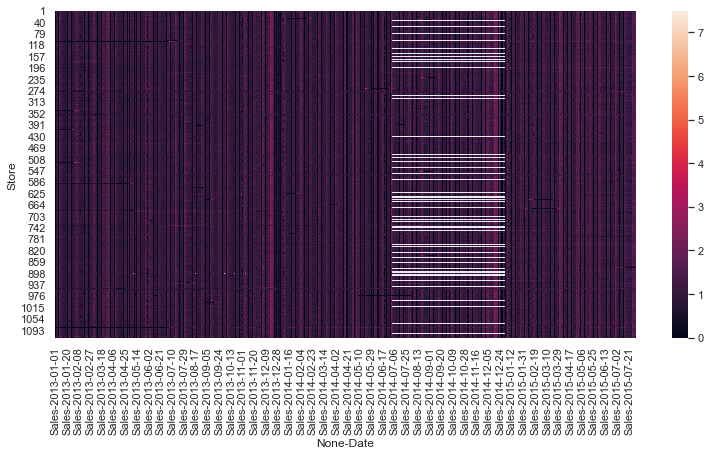

In [89]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.heatmap(data = x_norm, ax= ax);

### Recap

- stack
    - You are going from a wide format into a long format
- unstack
    - You are going from a long format into a wide format

## Pivoting

### Dataset

In [3]:
pivot_dataset = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Pandas Bootcamp\\P87-Section-7-Advanced-Manipulation-Resources\\pres16results.csv"

In [4]:
dfo = pd.read_csv(pivot_dataset)
dfo.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [5]:
len(dfo)

18475

In [7]:
top = dfo.loc[dfo["fips"] == "US", ["cand", "votes"]].sort_values("votes", ascending = False)
top.head()

,cand,votes
1,Hillary Clinton,60981118.0
0,Donald Trump,60350241.0
2,Gary Johnson,4164589.0
3,Jill Stein,1255968.0
4,Evan McMullin,451636.0


In [8]:
candidates = top.cand.head()


In [9]:
df = dfo[dfo["cand"].isin(candidates)]
df.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


### Pivot

In [10]:
p = df.pivot(index = "fips", columns = "cand", values = "votes")
p

cand,Donald Trump,Evan McMullin,Gary Johnson,Hillary Clinton,Jill Stein
fips,,,,,
10001,36989.0,NaN,2876.0,33347.0,1041.0
10003,85507.0,NaN,9101.0,162905.0,3955.0
10005,62607.0,NaN,2774.0,39329.0,1104.0
1001,18110.0,NaN,538.0,5908.0,105.0
1003,72780.0,NaN,2448.0,18409.0,453.0
...,...,...,...,...,...
VT,95053.0,NaN,10047.0,178179.0,6748.0
WA,1043648.0,NaN,131779.0,1523720.0,46016.0
WI,1409467.0,NaN,106442.0,1382210.0,30980.0


You can get the same output by using unstack.
- Its easier to use the pivot method and just specifying the columns and values.

In [11]:
df.set_index(["fips", "cand"]).votes.unstack()

cand,Donald Trump,Evan McMullin,Gary Johnson,Hillary Clinton,Jill Stein
fips,,,,,
10001,36989.0,NaN,2876.0,33347.0,1041.0
10003,85507.0,NaN,9101.0,162905.0,3955.0
10005,62607.0,NaN,2774.0,39329.0,1104.0
1001,18110.0,NaN,538.0,5908.0,105.0
1003,72780.0,NaN,2448.0,18409.0,453.0
...,...,...,...,...,...
VT,95053.0,NaN,10047.0,178179.0,6748.0
WA,1043648.0,NaN,131779.0,1523720.0,46016.0
WI,1409467.0,NaN,106442.0,1382210.0,30980.0


### Pivot Table

- Is a generalized version of pivot. 
- It handles duplicate values, generates MultiIndexes for you.
- This is the most common form of pivot.

In [5]:
data = [pd.read_csv(f"{year}.csv").assign(Year=year) for year in range(2015, 2020)]
for d in data:
    print(d.Year[0], d.columns)

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social supp

In [6]:
renames = {
    "Country or region": "Country",
    "Happiness Score": "Score",
    "Happiness.Score" : "Score",
    "Economy..GDP.per.Capita": "GDP per capita",
    "Economy..GDP.per.Capita.": "GDP per capita",
    "Economy (GDP per Capita)": "GDP per capita",
}

keep = ["Country", "Score", "Year", "GDP per capita"] 

data_prepped = [d.rename(columns = renames).loc[:, keep] for d in data]

In [7]:
df = pd.concat(data_prepped, sort = False).reset_index(drop= True)

In [8]:
with pd.option_context("display.max_rows", 800, "display.max_columns", 30):
    display(df)

,Country,Score,Year,GDP per capita
0,Switzerland,7.587,2015,1.396510
1,Iceland,7.561,2015,1.302320
2,Denmark,7.527,2015,1.325480
3,Norway,7.522,2015,1.459000
4,Canada,7.427,2015,1.326290
5,Finland,7.406,2015,1.290250
6,Netherlands,7.378,2015,1.329440
7,Sweden,7.364,2015,1.331710
8,New Zealand,7.286,2015,1.250180
9,Australia,7.284,2015,1.333580


In [9]:
df.pivot_table(index = "Country", values = "Score")

,Score
Country,
Afghanistan,3.51280
Albania,4.71260
Algeria,5.66760
Angola,3.87225
Argentina,6.45940
...,...
Venezuela,5.53140
Vietnam,5.15460
Yemen,3.62580


In [10]:
df.groupby("Country")["Score"].mean().to_frame()

,Score
Country,
Afghanistan,3.51280
Albania,4.71260
Algeria,5.66760
Angola,3.87225
Argentina,6.45940
...,...
Venezuela,5.53140
Vietnam,5.15460
Yemen,3.62580


How to use aggregate functions with pivot tables

In [11]:
df.pivot_table(index = "Country", values = "Score", aggfunc = [np.mean, np.std, np.median])

,mean,std,median
,Score,Score,Score
Country,,,
Afghanistan,3.51280,0.232634,3.5750
Albania,4.71260,0.145607,4.6550
Algeria,5.66760,0.465170,5.6050
Angola,3.87225,0.112272,3.8305
Argentina,6.45940,0.231017,6.5740
...,...,...,...
Venezuela,5.53140,0.897944,5.2500
Vietnam,5.15460,0.123009,5.1030


In [12]:
df.pivot_table(index = "Country", columns = "Year")

GDP per capita                                   Score         \
Year                  2015     2016      2017   2018   2019   2015   2016   
Country                                                                     
Afghanistan        0.31982  0.38227  0.401477  0.332  0.350  3.575  3.360   
Albania            0.87867  0.95530  0.996193  0.916  0.947  4.959  4.655   
Algeria            0.93929  1.05266  1.091864  0.979  1.002  5.605  6.355   
Angola             0.75778  0.84731  0.858428  0.730    NaN  4.033  3.866   
Argentina          1.05351  1.15137  1.185295  1.073  1.092  6.574  6.650   
...                    ...      ...       ...    ...    ...    ...    ...   
Venezuela          1.04424  1.13367  1.128431  0.996  0.960  6.810  6.084   
Vietnam            0.63216  0.74037  0.788548  0.715  0.741  5.360  5.061   
Yemen              0.54649  0.57939  0.591683  0.442  0.287  4.077  3.724   
Zambia             0.47038  0.61202  0.636407  0.562  0.578  5.129  4.795   
Zimbabwe           0.27100  0.35041  0.375847  0.357  0.366  4.610  4.193   

                                  
Year          2017   2018   2019  
Country                           
Afghanistan  3.794  3.632  3.203  
Albania      4.644  4.586  4.719  
Algeria      5.872  5.295  5.211  
Angola       3.795  3.795    NaN  
Argentina    6.599  6.388  6.086  
...            ...    ...    ...  
Venezuela    5.250  4.806  4.707  
Vietnam      5.074  5.103  5.175  
Yemen        3.593  3.355  3.380  
Zambia       4.514  4.377  4.107  
Zimbabwe     3.875  3.692  3.663  

[170 rows x 10 columns]

swapping the levels of the titles

In [15]:
df.pivot_table(index = "Country", columns = "Year").swaplevel(0,1, axis = 1).sort_index(axis = 1, level = 0)

Year                  2015                  2016                  2017         \
            GDP per capita  Score GDP per capita  Score GDP per capita  Score   
Country                                                                         
Afghanistan        0.31982  3.575        0.38227  3.360       0.401477  3.794   
Albania            0.87867  4.959        0.95530  4.655       0.996193  4.644   
Algeria            0.93929  5.605        1.05266  6.355       1.091864  5.872   
Angola             0.75778  4.033        0.84731  3.866       0.858428  3.795   
Argentina          1.05351  6.574        1.15137  6.650       1.185295  6.599   
...                    ...    ...            ...    ...            ...    ...   
Venezuela          1.04424  6.810        1.13367  6.084       1.128431  5.250   
Vietnam            0.63216  5.360        0.74037  5.061       0.788548  5.074   
Yemen              0.54649  4.077        0.57939  3.724       0.591683  3.593   
Zambia             0.47038  5.129        0.61202  4.795       0.636407  4.514   
Zimbabwe           0.27100  4.610        0.35041  4.193       0.375847  3.875   

Year                  2018                  2019         
            GDP per capita  Score GDP per capita  Score  
Country                                                  
Afghanistan          0.332  3.632          0.350  3.203  
Albania              0.916  4.586          0.947  4.719  
Algeria              0.979  5.295          1.002  5.211  
Angola               0.730  3.795            NaN    NaN  
Argentina            1.073  6.388          1.092  6.086  
...                    ...    ...            ...    ...  
Venezuela            0.996  4.806          0.960  4.707  
Vietnam              0.715  5.103          0.741  5.175  
Yemen                0.442  3.355          0.287  3.380  
Zambia               0.562  4.377          0.578  4.107  
Zimbabwe             0.357  3.692          0.366  3.663  

[170 rows x 10 columns]

## Pivot Margins

In [16]:
df.head()

,Country,Score,Year,GDP per capita
0,Switzerland,7.587,2015,1.39651
1,Iceland,7.561,2015,1.30232
2,Denmark,7.527,2015,1.32548
3,Norway,7.522,2015,1.45900
4,Canada,7.427,2015,1.32629


In [13]:
df.pivot_table(index = "Country", columns = "Year", values = "Score")

Year,2015,2016,2017,2018,2019
Country,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203
Albania,4.959,4.655,4.644,4.586,4.719
Algeria,5.605,6.355,5.872,5.295,5.211
Angola,4.033,3.866,3.795,3.795,NaN
Argentina,6.574,6.650,6.599,6.388,6.086
...,...,...,...,...,...
Venezuela,6.810,6.084,5.250,4.806,4.707
Vietnam,5.360,5.061,5.074,5.103,5.175
Yemen,4.077,3.724,3.593,3.355,3.380


In [19]:
df.pivot_table(index = "Country", columns = "Year", values = "Score", margins = True)

Year,2015,2016,2017,2018,2019,All
Country,,,,,,
Afghanistan,3.575000,3.360000,3.794000,3.632000,3.203000,3.512800
Albania,4.959000,4.655000,4.644000,4.586000,4.719000,4.712600
Algeria,5.605000,6.355000,5.872000,5.295000,5.211000,5.667600
Angola,4.033000,3.866000,3.795000,3.795000,NaN,3.872250
Argentina,6.574000,6.650000,6.599000,6.388000,6.086000,6.459400
...,...,...,...,...,...,...
Vietnam,5.360000,5.061000,5.074000,5.103000,5.175000,5.154600
Yemen,4.077000,3.724000,3.593000,3.355000,3.380000,3.625800
Zambia,5.129000,4.795000,4.514000,4.377000,4.107000,4.584400


In [20]:
df.pivot_table(index = "Country", columns = "Year", values = "Score", margins = True,
              aggfunc = np.sum, margins_name = "SumOfAll")

Year,2015,2016,2017,2018,2019,SumOfAll
Country,,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203,17.564
Albania,4.959,4.655,4.644,4.586,4.719,23.563
Algeria,5.605,6.355,5.872,5.295,5.211,28.338
Angola,4.033,3.866,3.795,3.795,NaN,15.489
Argentina,6.574,6.650,6.599,6.388,6.086,32.297
...,...,...,...,...,...,...
Vietnam,5.360,5.061,5.074,5.103,5.175,25.773
Yemen,4.077,3.724,3.593,3.355,3.380,18.129
Zambia,5.129,4.795,4.514,4.377,4.107,22.922


- np.diff calculates the difference between each year. 
- np.mean took the average difference between each year for each country

In [24]:
df.pivot_table(index = "Country", values =["Score", "GDP per capita"], margins = True, aggfunc = [np.mean, lambda x : np.mean(np.diff(x))])

C:\Users\pyria\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\pyria\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\pyria\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\pyria\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean                 <lambda>          
            GDP per capita     Score GDP per capita     Score
Country                                                      
Afghanistan       0.357113  3.512800       0.007545 -0.093000
Albania           0.938633  4.712600       0.017083 -0.060000
Algeria           1.012963  5.667600       0.015678 -0.098500
Angola            0.798380  3.872250      -0.009260 -0.079333
Argentina         1.111035  6.459400       0.009623 -0.122000
...                    ...       ...            ...       ...
Vietnam           0.723416  5.154600       0.027210 -0.046250
Yemen             0.489313  3.625800      -0.064873 -0.174250
Zambia            0.571761  4.584400       0.026905 -0.255500
Zimbabwe          0.344051  4.006600       0.023750 -0.236750
All               0.916047  5.379018      -0.001396 -0.006061

[171 rows x 4 columns]

In [14]:
res = df.pivot_table(index = "Country", values =["Score", "GDP per capita"], 
                     margins = True, aggfunc = [np.mean, lambda x : np.mean(np.diff(x))])
res

C:\Users\pyria\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\pyria\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\pyria\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\pyria\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean                 <lambda>          
            GDP per capita     Score GDP per capita     Score
Country                                                      
Afghanistan       0.357113  3.512800       0.007545 -0.093000
Albania           0.938633  4.712600       0.017083 -0.060000
Algeria           1.012963  5.667600       0.015678 -0.098500
Angola            0.798380  3.872250      -0.009260 -0.079333
Argentina         1.111035  6.459400       0.009623 -0.122000
...                    ...       ...            ...       ...
Vietnam           0.723416  5.154600       0.027210 -0.046250
Yemen             0.489313  3.625800      -0.064873 -0.174250
Zambia            0.571761  4.584400       0.026905 -0.255500
Zimbabwe          0.344051  4.006600       0.023750 -0.236750
All               0.916047  5.379018      -0.001396 -0.006061

[171 rows x 4 columns]

How to change the top level columns

In [15]:
res.columns = res.columns.set_levels(["mean_score", "avg_improvement"], level = 0)
res

mean_score           avg_improvement          
            GDP per capita     Score  GDP per capita     Score
Country                                                       
Afghanistan       0.357113  3.512800        0.007545 -0.093000
Albania           0.938633  4.712600        0.017083 -0.060000
Algeria           1.012963  5.667600        0.015678 -0.098500
Angola            0.798380  3.872250       -0.009260 -0.079333
Argentina         1.111035  6.459400        0.009623 -0.122000
...                    ...       ...             ...       ...
Vietnam           0.723416  5.154600        0.027210 -0.046250
Yemen             0.489313  3.625800       -0.064873 -0.174250
Zambia            0.571761  4.584400        0.026905 -0.255500
Zimbabwe          0.344051  4.006600        0.023750 -0.236750
All               0.916047  5.379018       -0.001396 -0.006061

[171 rows x 4 columns]

The reason why we are using tuples here is because we need to uniquely identify a specific column

In [16]:
res = res.dropna()
res = res.sort_values(("mean_score", "Score"))
res

mean_score          avg_improvement          
                         GDP per capita    Score  GDP per capita     Score
Country                                                                   
Burundi                        0.062447  3.07900        0.007675  0.217500
Central African Republic       0.032125  3.13425       -0.017500 -0.198333
Syria                          0.699109  3.29220       -0.011050  0.114000
South Sudan                    0.358547  3.38250       -0.029313 -0.326333
Rwanda                         0.322057  3.43860        0.034230 -0.032750
...                                 ...      ...             ...       ...
Iceland                        1.386523  7.51100        0.019420 -0.016750
Switzerland                    1.472164  7.51140        0.013873 -0.026750
Finland                        1.356960  7.53780        0.012438  0.090750
Norway                         1.519381  7.54100        0.007250  0.008000
Denmark                        1.396729  7.54600        0.014380  0.018250

[162 rows x 4 columns]

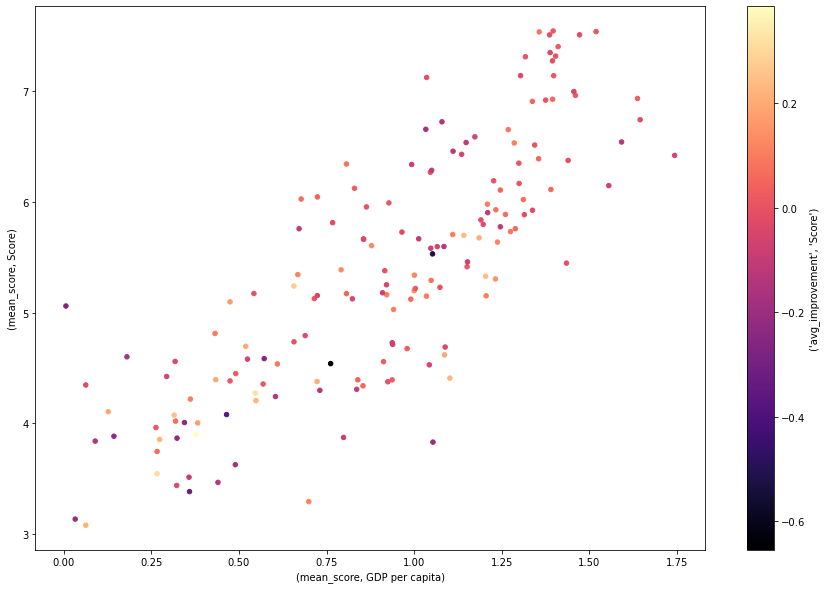

In [17]:
fig, ax = plt.subplots(figsize = (15,10))
res.plot.scatter(("mean_score", "GDP per capita"), ("mean_score", "Score" ), c = ("avg_improvement", "Score"), cmap = "magma", ax = ax);

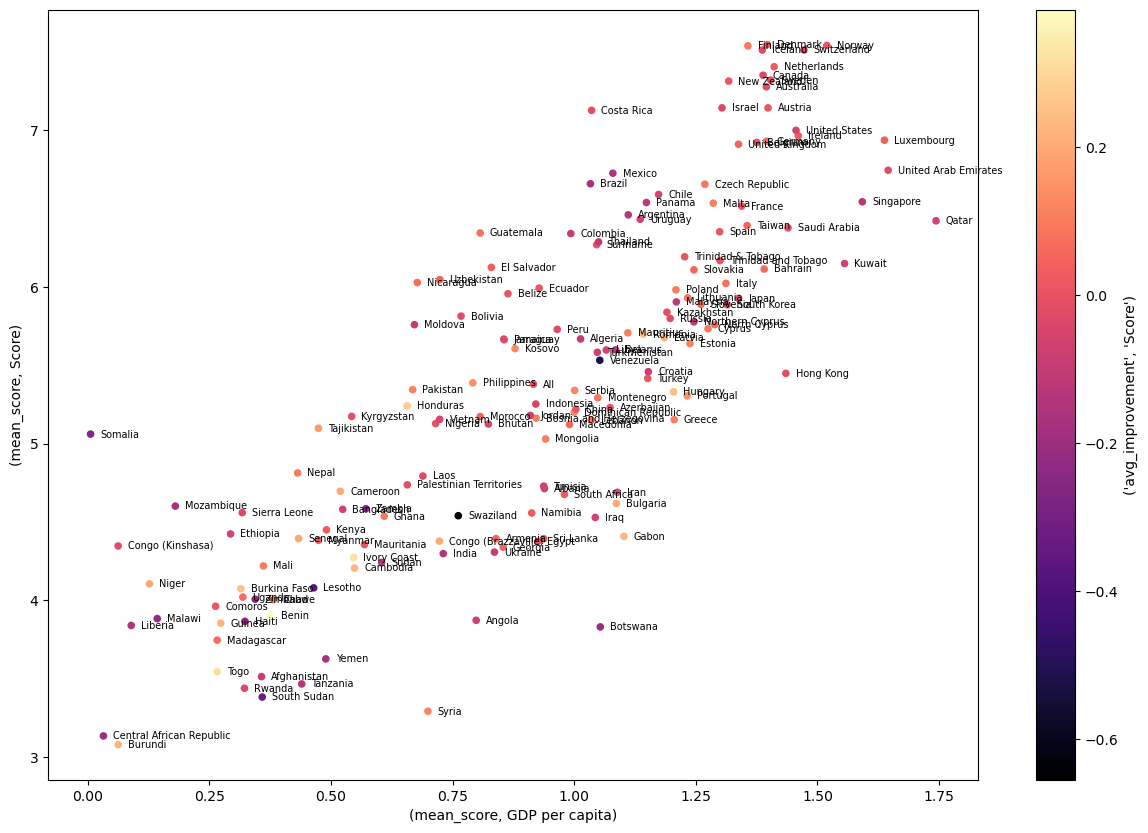

In [49]:
xs = res[("mean_score", "GDP per capita")]
ys = res[("mean_score", "Score")]
ls = res.index
for l, x, y in zip(ls, xs, ys):
    ax.text(x + 0.02, y, l, fontsize = 7, va = "center")
ax.get_figure()

### Postprocessing Data

- The qcut function can be used to simplify the data.
- qcut serves as a quantile cut. 
- It cuts the data in sections based on quantiles.
- Quantiles sit relative to other data points.
- For example split the data into top, middle, and bottom thirds.
- This is very similar to the cut method.

In [51]:
labels = [f"{i +1} stars" for i in range(5)]
stars = pd.qcut(res[("mean_score", "Score")], 5, labels = labels)
stars.value_counts()

1 stars    33
5 stars    33
2 stars    32
3 stars    32
4 stars    32
Name: (mean_score, Score), dtype: int64

In [52]:
res["TrivializingHappiness"] = stars
res

mean_score          avg_improvement            \
                         GDP per capita    Score  GDP per capita     Score   
Country                                                                      
Burundi                        0.062447  3.07900        0.007675  0.217500   
Central African Republic       0.032125  3.13425       -0.017500 -0.198333   
Syria                          0.699109  3.29220       -0.011050  0.114000   
South Sudan                    0.358547  3.38250       -0.029313 -0.326333   
Rwanda                         0.322057  3.43860        0.034230 -0.032750   
...                                 ...      ...             ...       ...   
Iceland                        1.386523  7.51100        0.019420 -0.016750   
Switzerland                    1.472164  7.51140        0.013873 -0.026750   
Finland                        1.356960  7.53780        0.012438  0.090750   
Norway                         1.519381  7.54100        0.007250  0.008000   
Denmark                        1.396729  7.54600        0.014380  0.018250   

                         TrivializingHappiness  
                                                
Country                                         
Burundi                                1 stars  
Central African Republic               1 stars  
Syria                                  1 stars  
South Sudan                            1 stars  
Rwanda                                 1 stars  
...                                        ...  
Iceland                                5 stars  
Switzerland                            5 stars  
Finland                                5 stars  
Norway                                 5 stars  
Denmark                                5 stars  

[162 rows x 5 columns]

Recap:
- Pivot margins are super easy to add.
- droplevel
- How to use tuple index in plots.

## Crosstab

### Dataset

In [2]:
heroes_dataset = "C:\\Users\pyria\\OneDrive\\Documents\Personal Development\\Python\\\
Bootcamps\\Pandas Bootcamp\\P87-Section-7-Advanced-Manipulation-Resources\\heroes_information.csv"

In [3]:
df = pd.read_csv(heroes_dataset)
df.drop(columns = df.columns[0], inplace = True)
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


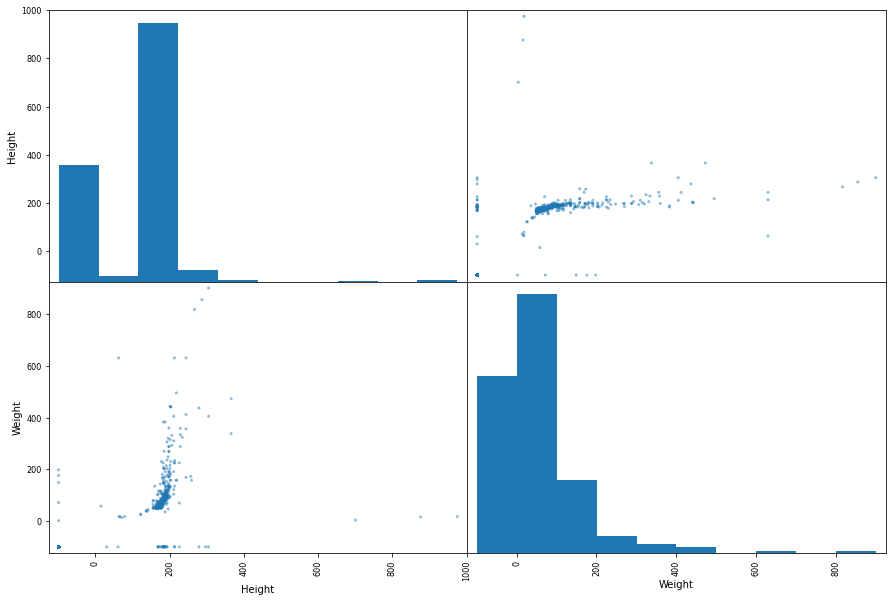

In [22]:
pd.plotting.scatter_matrix(df, figsize = (15,10));

### Crosstab

- Default aggregation is length, which is a count of frequency.
- Expects your data to be in the form of arrays

Differences:
- Pivot_tables expects that your data is in the form of a dataframe
- Pivot_tables default aggregation is mean


In [57]:
pd.crosstab(index= df["Skin color"], columns= df["Eye color"])

Eye color,-,amber,black,blue,blue / white,bown,brown,gold,green,green / blue,...,purple,red,silver,violet,white,white / red,yellow,yellow (without irises),yellow / blue,yellow / red
Skin color,,,,,,,,,,,,,,,,,,,,,
-,167,2,18,212,1,1,125,2,63,1,...,2,28,1,2,9,1,13,1,1,0
black,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blue,0,0,1,5,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
blue-white,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
gold,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
gray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
green,1,0,1,2,0,0,1,0,7,0,...,1,7,0,0,0,0,1,0,0,0
grey,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
orange,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


To replicate the previous result with pivot tables

In [58]:
df.pivot_table(index = "Skin color", columns = "Eye color", values = "Alignment",
              aggfunc = "count", dropna = False, fill_value = 0)

Eye color,-,amber,black,blue,blue / white,bown,brown,gold,green,green / blue,...,purple,red,silver,violet,white,white / red,yellow,yellow (without irises),yellow / blue,yellow / red
Skin color,,,,,,,,,,,,,,,,,,,,,
-,167,2,18,212,1,1,125,2,63,1,...,2,28,1,2,9,1,13,1,1,0
black,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blue,0,0,1,5,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
blue-white,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
gold,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
gray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
green,1,0,1,2,0,0,1,0,7,0,...,1,7,0,0,0,0,1,0,0,0
grey,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
orange,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Crosstab has an option available that pivot_table does not have: Normalize

- First, group on Gender and Alignment and then do a count.

In [24]:
pd.crosstab(index= df["Gender"], columns = df["Alignment"], margins = True)

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,1,7,19,2,29
Female,0,35,161,4,200
Male,6,165,316,18,505
All,7,207,496,24,734


This would be more useful if we saw this as a fraction of the whole

In [25]:
pd.crosstab(index= df["Gender"], columns = df["Alignment"], margins = True, normalize = "all")

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,0.001362,0.009537,0.025886,0.002725,0.039510
Female,0.000000,0.047684,0.219346,0.005450,0.272480
Male,0.008174,0.224796,0.430518,0.024523,0.688011
All,0.009537,0.282016,0.675749,0.032698,1.000000


In [26]:
100 * pd.crosstab(index= df["Gender"], columns = df["Alignment"], margins = True, normalize = "all")

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,0.136240,0.953678,2.588556,0.272480,3.950954
Female,0.000000,4.768392,21.934605,0.544959,27.247956
Male,0.817439,22.479564,43.051771,2.452316,68.801090
All,0.953678,28.201635,67.574932,3.269755,100.000000


The columns sum to 100%.

In [27]:
100 * pd.crosstab(index= df["Gender"], columns = df["Alignment"], margins = True, normalize = "columns")

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,14.285714,3.381643,3.830645,8.333333,3.950954
Female,0.000000,16.908213,32.459677,16.666667,27.247956
Male,85.714286,79.710145,63.709677,75.000000,68.801090


## Melting

Unwrap a 2D dataframe like this.

In [4]:
res = df.fillna(0).pivot_table(index = "Gender", columns = "Alignment", values = "Height", aggfunc = "count", margins = True, fill_value= 0)
res

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,1,7,19,2,29
Female,0,35,161,4,200
Male,6,165,316,18,505
All,7,207,496,24,734


When we use the melt method the gender disappeared.

In [6]:
res.melt()

,Alignment,value
0,-,1
1,-,0
2,-,6
3,-,7
4,bad,7
5,bad,35
6,bad,165
7,bad,207
8,good,19
9,good,161


In [7]:
res.reset_index().melt()

,Alignment,value
0,Gender,-
1,Gender,Female
2,Gender,Male
3,Gender,All
4,-,1
5,-,0
6,-,6
7,-,7
8,bad,7
9,bad,35


In [8]:
res.reset_index()

Alignment,Gender,-,bad,good,neutral,All
0,-,1,7,19,2,29
1,Female,0,35,161,4,200
2,Male,6,165,316,18,505
3,All,7,207,496,24,734


In [13]:
works = res.reset_index().melt(id_vars = "Gender", value_name = "Count")
works

,Gender,Alignment,Count
0,-,-,1
1,Female,-,0
2,Male,-,6
3,All,-,7
4,-,bad,7
5,Female,bad,35
6,Male,bad,165
7,All,bad,207
8,-,good,19
9,Female,good,161


In [14]:
works.pivot_table(index = "Gender", columns = "Alignment", values = "Count")

Alignment,-,All,bad,good,neutral
Gender,,,,,
-,1,29,7,19,2
All,7,734,207,496,24
Female,0,200,35,161,4
Male,6,505,165,316,18


In [15]:
works.set_index(["Gender", "Alignment"])["Count"].unstack()

Alignment,-,All,bad,good,neutral
Gender,,,,,
-,1,29,7,19,2
All,7,734,207,496,24
Female,0,200,35,161,4
Male,6,505,165,316,18


There are many different ways of doing things in Pandas.

- You can use a pivot_table and unstack to undo a melt.
- Melt simply flattensout a pivot table. 

In [16]:
res

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,1,7,19,2,29
Female,0,35,161,4,200
Male,6,165,316,18,505
All,7,207,496,24,734


This gets us back to what we had before

In [17]:
res.stack().to_frame("Count").reset_index()

,Gender,Alignment,Count
0,-,-,1
1,-,bad,7
2,-,good,19
3,-,neutral,2
4,-,All,29
5,Female,-,0
6,Female,bad,35
7,Female,good,161
8,Female,neutral,4
9,Female,All,200


## Summary

- Pivot: long to wide
- Pivot_table: Add aggregation
- Crosstab: For arrays + normalization
- Melt + stack + unstack

MultiIndex, GroupBy, Pivot, Crosstab, Pivot Table are:

- Highly related
- For specific cases
- Use whatever feels natural